###### Business problem : To find out whether a person with a passenger ID has survived the shipwreckage or not.
###### Steps to follow : Trying to understand the data,finding missing values in the dataset,if any and filling it if it is required.
######                              Going for Data preparation where we convert the categorical columns into numerical columns for better understanding of                                             the data.Plots to be done to get to know more about the data in an easy way.
######                              Next step is to build the model on the training set and then try to test it in the future
######                              Getting the accuracy and trying to tune it with GridSearchCV

# Data Understanding

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Importing the Dataset
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Describing the dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.shape

(891, 12)

In [6]:
df1 = df.drop(columns = ['PassengerId','Ticket','Cabin'])

In [7]:
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [8]:
df1.shape

(891, 9)

In [9]:
df1['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
df1['Embarked'].isnull().sum()

2

In [11]:
df1.dropna(subset = ['Embarked'],how = 'all', inplace = True)

In [12]:
df1.shape

(889, 9)

In [13]:
# Converting Categorical Data of 'Pclass' with one hot-encoded data
from sklearn.preprocessing import LabelBinarizer
df_one_hot = df1
lb = LabelBinarizer()
lb_results = lb.fit_transform(df_one_hot['Pclass'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
lb_results_df.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [14]:
lb_results_df.shape

(889, 3)

In [15]:
final = pd.concat([df_one_hot.reset_index(drop=True),lb_results_df.reset_index(drop=True)],axis = 1)

In [16]:
final

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,1,2,3
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,0,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,0,1
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,0,0,1
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,1,0,0
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,0,0,1
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,0,0,1
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,0,1,0


In [17]:
# Converting Categorical Data of 'Embarked' with one hot-encoded data
df_one_hot_en = final.copy()
lb_en = LabelBinarizer()
lb_results_en = lb_en.fit_transform(df_one_hot_en['Embarked'])
lb_results_df_en = pd.DataFrame(lb_results_en, columns=lb_en.classes_)
lb_results_df_en.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [18]:
final_df_en = pd.concat([df_one_hot_en.reset_index(drop=True),lb_results_df_en.reset_index(drop=True)],axis = 1)

In [19]:
print("Original dimensions :", df.shape)
print("One hot Encoded dimensions :", final_df_en.shape)
final_df_en.head()

Original dimensions : (891, 12)
One hot Encoded dimensions : (889, 15)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,1,2,3,C,Q,S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,0,1,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,0,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,0,1,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,0,0,0,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,0,1,0,0,1


In [20]:
# Replace Missing values in ‘Total’ using Mean/Median
missing_col = final_df_en[['Age']]
median = final_df_en[['Age']].median()
d = missing_col.fillna(median)
v = round(d)
v

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
5,28.0
6,54.0
7,2.0
8,27.0
9,14.0


In [21]:
final_df_en['Age'] = v
final_df_en.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,1,2,3,C,Q,S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,0,1,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,0,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,0,1,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,0,0,0,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,0,1,0,0,1


In [22]:
final_df_en

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,1,2,3,C,Q,S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,0,1,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,0,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,0,1,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,0,0,0,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,0,1,0,0,1
5,0,3,"Moran, Mr. James",male,28.0,0,0,8.4583,Q,0,0,1,0,1,0
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,1,0,0,0,0,1
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,0,0,1,0,0,1
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,0,0,1,0,0,1
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,0,1,0,1,0,0


In [23]:
final_df_en['Survive_Person'] = final_df_en['Survived']

In [24]:
final_df_en.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,1,2,3,C,Q,S,Survive_Person
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,0,1,0,0,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,0,0,1,0,0,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,0,1,0,0,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,0,0,0,0,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,0,1,0,0,1,0


In [25]:
final_df_en = final_df_en.drop(columns = ['Survived'])

In [26]:
final_df_en.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,1,2,3,C,Q,S,Survive_Person
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,0,1,0,0,1,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,0,0,1,0,0,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,0,1,0,0,1,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,0,0,0,0,1,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,0,1,0,0,1,0


In [27]:
final_df_en = final_df_en.rename(columns = {'Survive_Person':'Survived'})

In [28]:
final_df_en.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,1,2,3,C,Q,S,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,0,1,0,0,1,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,0,0,1,0,0,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,0,1,0,0,1,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,0,0,0,0,1,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,0,1,0,0,1,0


In [29]:
final_df_en = final_df_en.drop(columns = ['Pclass','Embarked'])

In [30]:
final_df_en.head()

,Name,Sex,Age,SibSp,Parch,Fare,1,2,3,C,Q,S,Survived
0,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,0,1,0,0,1,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,1,0,0,1,0,0,1
2,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0,0,1,0,0,1,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,0,0,0,0,1,1
4,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,0,1,0,0,1,0


In [31]:
final_df_en = final_df_en.drop(columns = ['SibSp','Parch','Fare'])

In [32]:
final_df_en.head()

,Name,Sex,Age,1,2,3,C,Q,S,Survived
0,"Braund, Mr. Owen Harris",male,22.0,0,0,1,0,0,1,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,0,1,0,0,1
2,"Heikkinen, Miss. Laina",female,26.0,0,0,1,0,0,1,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,0,0,0,1,1
4,"Allen, Mr. William Henry",male,35.0,0,0,1,0,0,1,0


In [33]:
final_df_en.shape

(889, 10)

In [34]:
# Getting info of our dataset
final_df_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
Name        889 non-null object
Sex         889 non-null object
Age         889 non-null float64
1           889 non-null int32
2           889 non-null int32
3           889 non-null int32
C           889 non-null int32
Q           889 non-null int32
S           889 non-null int32
Survived    889 non-null int64
dtypes: float64(1), int32(6), int64(1), object(2)
memory usage: 48.7+ KB


In [35]:
# Converting 'Age' column having float values to integer
final_df_en['Age'] = final_df_en['Age'].astype(int)
final_df_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
Name        889 non-null object
Sex         889 non-null object
Age         889 non-null int32
1           889 non-null int32
2           889 non-null int32
3           889 non-null int32
C           889 non-null int32
Q           889 non-null int32
S           889 non-null int32
Survived    889 non-null int64
dtypes: int32(7), int64(1), object(2)
memory usage: 45.2+ KB


In [36]:
# Setting 'Name' as our index column
final_df_en = final_df_en.set_index('Name')
final_df_en.head()

,Sex,Age,1,2,3,C,Q,S,Survived
Name,,,,,,,,,
"Braund, Mr. Owen Harris",male,22,0,0,1,0,0,1,0
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,0,1,0,0,1
"Heikkinen, Miss. Laina",female,26,0,0,1,0,0,1,1
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,0,0,0,1,1
"Allen, Mr. William Henry",male,35,0,0,1,0,0,1,0


In [37]:
# Replacing 'Sex' column with Male having value of 1 and Female having value of 0
final_df_en["Sex"]= final_df_en["Sex"].replace('male', 1) 
final_df_en["Sex"]= final_df_en["Sex"].replace('female', 0) 

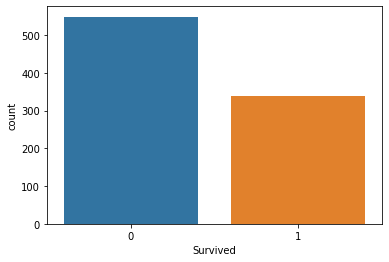

In [38]:
# Plot to show people who survived the wreck vs who could not survive it
sns.countplot(final_df_en['Survived'])

In [39]:
correlations = final_df_en.corr()

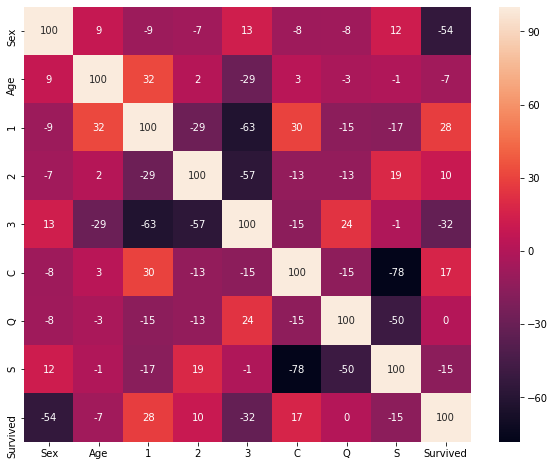

In [40]:
# Correlation Matrix of Dataset
plt.figure(figsize=(10,8))
correlations = correlations * 100
sns.heatmap(correlations,annot = True,fmt = '.0f')

C:\Users\Windows 10\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Windows 10\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

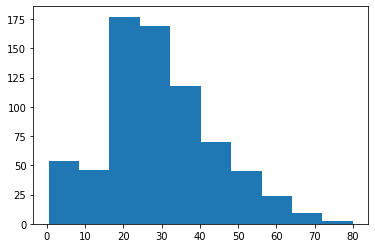

In [41]:
plt.hist(df['Age'])

# Modelling

In [42]:
##Separate the input & output from data
X = final_df_en.iloc[:,0:8]
y = final_df_en.iloc[:,-1]

In [43]:
X

,Sex,Age,1,2,3,C,Q,S
Name,,,,,,,,
"Braund, Mr. Owen Harris",1,22,0,0,1,0,0,1
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",0,38,1,0,0,1,0,0
"Heikkinen, Miss. Laina",0,26,0,0,1,0,0,1
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,0,0,0,1
"Allen, Mr. William Henry",1,35,0,0,1,0,0,1
"Moran, Mr. James",1,28,0,0,1,0,1,0
"McCarthy, Mr. Timothy J",1,54,1,0,0,0,0,1
"Palsson, Master. Gosta Leonard",1,2,0,0,1,0,0,1
"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27,0,0,1,0,0,1


In [44]:
y

Name
Braund, Mr. Owen Harris                                      0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)          1
Heikkinen, Miss. Laina                                       1
Futrelle, Mrs. Jacques Heath (Lily May Peel)                 1
Allen, Mr. William Henry                                     0
Moran, Mr. James                                             0
McCarthy, Mr. Timothy J                                      0
Palsson, Master. Gosta Leonard                               0
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)            1
Nasser, Mrs. Nicholas (Adele Achem)                          1
Sandstrom, Miss. Marguerite Rut                              1
Bonnell, Miss. Elizabeth                                     1
Saundercock, Mr. William Henry                               0
Andersson, Mr. Anders Johan                                  0
Vestrom, Miss. Hulda Amanda Adolfina                         0
Hewlett, Mrs. (Mary D Kingcome)                   

In [45]:
# Split the data set in a training set (80%) and a test set (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)

#### Applying Logistic Regression model to our data

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
##Initialize parameters
num_folds = 5
seed = 27
kfold = KFold(n_splits=num_folds, random_state=seed)
c = LogisticRegression()      
model_fit = c.fit(X_train,y_train)

# Fitting the model and Extracting the results
results1 = cross_val_score(c, X, y, cv=kfold)

# Check the accuracy
print("Accuracy: ", results1*100.0)
print(results1.mean()*100.0, results1.std()*100.0)

Accuracy:  [78.65168539 79.7752809  78.65168539 75.28089888 81.92090395]
78.85609090332 2.149583705877688


C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

In [47]:
# Predicted value
y_pred_log= c.predict(X_test)
y_pred_log

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1], dtype=int64)

In [48]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_log)

array([[96, 17],
       [20, 45]], dtype=int64)

In [49]:
# Checking accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_log)

0.7921348314606742

#### Applying Random Forest Classifier model to our data

In [50]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state = 2)
classifier_rf.fit(X_train,y_train)

C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [51]:
# Predicting the Test set results
y_pred_rf = classifier_rf.predict(X_test)

In [52]:
y_pred_rf

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1], dtype=int64)

In [53]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_rf)

array([[95, 18],
       [15, 50]], dtype=int64)

In [54]:
from sklearn.metrics import accuracy_score
# Checking accuracy score
accuracy_score(y_test, y_pred_rf)

0.8146067415730337

###### Doing GridSearchCV on RandomForestClassifier

In [55]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [400,500]
}
grid_rf = GridSearchCV(estimator = classifier_rf,scoring = 'accuracy', param_grid=param_grid,n_jobs = -1,cv = 20,
                    verbose = 2)
grid_rf.fit(X_train,y_train)

Fitting 20 folds for each of 2 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   29.9s finished
C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=20, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=2,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1, param_grid={'n_estimators': [400

In [56]:
# Predicting the Test set results
y_pred_rf_grid = grid_rf.predict(X_test)
y_pred_rf_grid

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1], dtype=int64)

In [57]:
accuracy_score(y_test, y_pred_rf_grid)

0.8258426966292135

##### Applying GradientBoostingClassifier model to our data

In [58]:
# Fitting GBM to the Training set
from sklearn.ensemble import GradientBoostingClassifier
classifier_gbm = GradientBoostingClassifier(random_state = 10)
classifier_gbm.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [59]:
# Predicting the Test set results
y_pred_gbm = classifier_gbm.predict(X_test)
y_pred_gbm

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1], dtype=int64)

In [60]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_gbm)

array([[105,   8],
       [ 17,  48]], dtype=int64)

In [61]:
gbm = accuracy_score(y_test, y_pred_gbm)
gbm

0.8595505617977528

###### Doing GridSearchCV on GradientBoostingClassifier

In [62]:
from sklearn.model_selection import GridSearchCV
param_grid_gbm = { 
    'n_estimators': [300,400]
}
grid_gbm = GridSearchCV(estimator = classifier_gbm,scoring = 'accuracy', param_grid=param_grid_gbm,n_jobs = -1,cv = 10,
                    verbose = 2)
grid_gbm.fit(X_train,y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.1s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort

In [63]:
# Predicting the Test set results
y_pred_gbm_grid = grid_gbm.predict(X_test)
y_pred_gbm_grid

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1], dtype=int64)

In [64]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_gbm_grid)

array([[100,  13],
       [ 18,  47]], dtype=int64)

In [65]:
x_gbm = accuracy_score(y_test, y_pred_gbm_grid)
x_gbm

0.8258426966292135

##### Applying XGBoostClassifier model to our data

In [66]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(random_state = 7)
classifier_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=7,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [67]:
# Predicting the Test set results
y_pred_xgb = classifier_xgb.predict(X_test)
y_pred_xgb

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1], dtype=int64)

In [68]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_xgb)

array([[106,   7],
       [ 20,  45]], dtype=int64)

In [69]:
x_xgb = accuracy_score(y_test, y_pred_xgb)
x_xgb

0.848314606741573

###### Doing GridSearchCV on XGBoostClassifier

In [70]:
from sklearn.model_selection import GridSearchCV
param_grid_xgb = { 
    'n_estimators': [400,500]
}
grid_xgb = GridSearchCV(estimator = classifier_xgb,scoring = 'accuracy', param_grid=param_grid_xgb,n_jobs = -1,cv = 10,
                    verbose = 2)
grid_xgb.fit(X_train,y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.0s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=7, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1, param_grid={'n_estimators': [400, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=2)

In [71]:
# Predicting the Test set results
y_pred_xgb_grid = grid_xgb.predict(X_test)
y_pred_xgb_grid

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1], dtype=int64)

In [72]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_xgb_grid)

array([[104,   9],
       [ 18,  47]], dtype=int64)

In [73]:
x_xgb_grid = accuracy_score(y_test, y_pred_xgb_grid)
x_xgb_grid

0.848314606741573

##### Applying NaiveBayes model to our data

In [74]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [75]:
# Predicting the Test set results
y_pred_nb = classifier_nb.predict(X_test)

In [76]:
y_pred_nb

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1], dtype=int64)

In [77]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_nb

array([[88, 25],
       [17, 48]], dtype=int64)

In [78]:
# Accuracy score for NB
accuracy_score(y_test, y_pred_nb)

0.7640449438202247

##### Applying SVC model to our data

In [79]:
# Fitting SVC to the dataset
from sklearn.svm import SVC
classifier_SVC = SVC(kernel = 'rbf',random_state = 0)
classifier_SVC.fit(X, y)

C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [80]:
# Predicting the Test set results
y_pred_SVC = classifier_SVC.predict(X_test)

In [81]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_SVC)

array([[97, 16],
       [11, 54]], dtype=int64)

In [82]:
# Accuracy score for SVC
accuracy_score(y_test, y_pred_SVC)

0.848314606741573

###### Doing GridSearchCV on SVC

In [83]:
from sklearn.model_selection import GridSearchCV
param_grid_SVC = { 
    'n_estimators': [400,500]
}
grid_SVC = GridSearchCV(estimator = classifier_xgb,scoring = 'accuracy', param_grid=param_grid_SVC,n_jobs = -1,cv = 10,
                    verbose = 2)
grid_SVC.fit(X_train,y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.0s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=7, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1, param_grid={'n_estimators': [400, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=2)

In [84]:
# Predicting the Test set results
y_pred_SVC_grid = grid_SVC.predict(X_test)
y_pred_SVC_grid

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1], dtype=int64)

In [85]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_SVC_grid)

array([[104,   9],
       [ 18,  47]], dtype=int64)

In [86]:
# Accuracy score for SVC
accuracy_score(y_test, y_pred_SVC_grid)

0.848314606741573

##### Training error

In [87]:
# Training error
training_error = 1 - (classifier_gbm.score(X_train,y_train))
training_error

0.13361462728551332

##### Testing error

In [88]:
#Test error
test_error = 1 - gbm

In [89]:
test_error

0.1404494382022472

##### Saving the model

In [90]:
# Save the model by using joblib
from sklearn.externals import joblib  
joblib.dump(classifier_gbm , 'Titanic_Survival_Zero.pkl') 

C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['Titanic_Survival_Zero.pkl']

In [91]:
# Load the model from the file 
classifier_gbm_from_joblib = joblib.load('Titanic_Survival_Zero.pkl')  

## Test Data

In [92]:
#Import the test file on which we need to do the predictions
df_titanic = pd.read_csv('test.csv')

In [93]:
df_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [94]:
df_titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [95]:
# Dropping the columns which we don't need to make our predictions
df_test = df_titanic.drop(columns = ['PassengerId','Ticket','Cabin','Fare','SibSp','Parch'])

In [96]:
df_test.head()

,Pclass,Name,Sex,Age,Embarked
0,3,"Kelly, Mr. James",male,34.5,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,Q
3,3,"Wirz, Mr. Albert",male,27.0,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,S


In [97]:
df_test.shape

(418, 5)

In [98]:
# Converting Categorical Data of column 'Pclass' with one hot-encoded data
from sklearn.preprocessing import LabelBinarizer
df_one_hot_test = df_test
lb = LabelBinarizer()
lb_results_test = lb.fit_transform(df_one_hot_test['Pclass'])
lb_results_df_test = pd.DataFrame(lb_results_test, columns=lb.classes_)
lb_results_df_test.head()

,1,2,3
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [99]:
final_test = pd.concat([df_one_hot_test.reset_index(drop=True),lb_results_df_test.reset_index(drop=True)],axis = 1)

In [100]:
# Converting Categorical Data of column 'Embarked' with one hot-encoded data
df_one_hot_en_test = final_test.copy()
lb_en_test = LabelBinarizer()
lb_results_en_test = lb_en_test.fit_transform(df_one_hot_en_test['Embarked'])
lb_results_df_en_test = pd.DataFrame(lb_results_en_test, columns=lb_en.classes_)
lb_results_df_en_test.head()

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [101]:
final_df_en_test = pd.concat([df_one_hot_en_test.reset_index(drop=True),lb_results_df_en_test.reset_index(drop=True)],axis = 1)

In [102]:
print("Original dimensions :", df_test.shape)
print("One hot Encoded dimensions :", final_df_en_test.shape)
final_df_en_test.head()

Original dimensions : (418, 5)
One hot Encoded dimensions : (418, 11)


,Pclass,Name,Sex,Age,Embarked,1,2,3,C,Q,S
0,3,"Kelly, Mr. James",male,34.5,Q,0,0,1,0,1,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,S,0,0,1,0,0,1
2,2,"Myles, Mr. Thomas Francis",male,62.0,Q,0,1,0,0,1,0
3,3,"Wirz, Mr. Albert",male,27.0,S,0,0,1,0,0,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,S,0,0,1,0,0,1


In [103]:
final_df_en_test = final_df_en_test.drop(columns = ['Embarked','Pclass'])

In [104]:
final_df_en_test.head()

,Name,Sex,Age,1,2,3,C,Q,S
0,"Kelly, Mr. James",male,34.5,0,0,1,0,1,0
1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,0,0,1,0,0,1
2,"Myles, Mr. Thomas Francis",male,62.0,0,1,0,0,1,0
3,"Wirz, Mr. Albert",male,27.0,0,0,1,0,0,1
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,0,0,1,0,0,1


In [105]:
# Replace Missing values in ‘Total’ using Mean/Median
missing_col_test = final_df_en_test[['Age']]
mean_test = final_df_en_test[['Age']].mean()
d_test = missing_col_test.fillna(mean_test)
v_test = round(d_test)
v_test

,Age
0,34.0
1,47.0
2,62.0
3,27.0
4,22.0
5,14.0
6,30.0
7,26.0
8,18.0
9,21.0


In [106]:
final_df_en_test['Age'] = v_test
final_df_en_test.head()

,Name,Sex,Age,1,2,3,C,Q,S
0,"Kelly, Mr. James",male,34.0,0,0,1,0,1,0
1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,0,0,1,0,0,1
2,"Myles, Mr. Thomas Francis",male,62.0,0,1,0,0,1,0
3,"Wirz, Mr. Albert",male,27.0,0,0,1,0,0,1
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,0,0,1,0,0,1


In [107]:
final_df_en_test.isnull().sum()

Name    0
Sex     0
Age     0
1       0
2       0
3       0
C       0
Q       0
S       0
dtype: int64

In [108]:
final_df_en_test.head()

,Name,Sex,Age,1,2,3,C,Q,S
0,"Kelly, Mr. James",male,34.0,0,0,1,0,1,0
1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,0,0,1,0,0,1
2,"Myles, Mr. Thomas Francis",male,62.0,0,1,0,0,1,0
3,"Wirz, Mr. Albert",male,27.0,0,0,1,0,0,1
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,0,0,1,0,0,1


In [109]:
final_df_en_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Name    418 non-null object
Sex     418 non-null object
Age     418 non-null float64
1       418 non-null int32
2       418 non-null int32
3       418 non-null int32
C       418 non-null int32
Q       418 non-null int32
S       418 non-null int32
dtypes: float64(1), int32(6), object(2)
memory usage: 19.7+ KB


In [110]:
# Converting 'Age' column having float values with Integer values
final_df_en_test['Age'] = final_df_en_test['Age'].astype(int)
final_df_en_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Name    418 non-null object
Sex     418 non-null object
Age     418 non-null int32
1       418 non-null int32
2       418 non-null int32
3       418 non-null int32
C       418 non-null int32
Q       418 non-null int32
S       418 non-null int32
dtypes: int32(7), object(2)
memory usage: 18.0+ KB


In [111]:
# Setting 'Name' column as the Index column
final_df_en_test = final_df_en_test.set_index('Name')
final_df_en_test.head()

,Sex,Age,1,2,3,C,Q,S
Name,,,,,,,,
"Kelly, Mr. James",male,34,0,0,1,0,1,0
"Wilkes, Mrs. James (Ellen Needs)",female,47,0,0,1,0,0,1
"Myles, Mr. Thomas Francis",male,62,0,1,0,0,1,0
"Wirz, Mr. Albert",male,27,0,0,1,0,0,1
"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,0,0,1,0,0,1


In [112]:
# Replacing 'Sex' column with Male having value of 1 and Female having value of 0
final_df_en_test["Sex"]= final_df_en_test["Sex"].replace('male', 1) 
final_df_en_test["Sex"]= final_df_en_test["Sex"].replace('female', 0) 

In [113]:
final_df_en_test.head()

,Sex,Age,1,2,3,C,Q,S
Name,,,,,,,,
"Kelly, Mr. James",1,34,0,0,1,0,1,0
"Wilkes, Mrs. James (Ellen Needs)",0,47,0,0,1,0,0,1
"Myles, Mr. Thomas Francis",1,62,0,1,0,0,1,0
"Wirz, Mr. Albert",1,27,0,0,1,0,0,1
"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22,0,0,1,0,0,1


In [114]:
# Splitting the input data into X variable
X1 = final_df_en_test.iloc[:,:]
X_train_test, X_test_1 = train_test_split(X1,random_state=27)

In [115]:
X_train_test.shape

(313, 8)

In [116]:
X1.shape

(418, 8)

In [117]:
X1.head()

,Sex,Age,1,2,3,C,Q,S
Name,,,,,,,,
"Kelly, Mr. James",1,34,0,0,1,0,1,0
"Wilkes, Mrs. James (Ellen Needs)",0,47,0,0,1,0,0,1
"Myles, Mr. Thomas Francis",1,62,0,1,0,0,1,0
"Wirz, Mr. Albert",1,27,0,0,1,0,0,1
"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22,0,0,1,0,0,1


In [118]:
y_pred_test = classifier_gbm_from_joblib.predict(X1)
y_pred_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [119]:
X1.shape

(418, 8)

### Testing our predicted values with the actual values

In [122]:
# Importing the dataset with actual values
df_titanic_test = pd.read_csv('gender_submission.csv')

In [123]:
df_titanic_test

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [124]:
df_titanic_test.shape

(418, 2)

In [125]:
df_titanic_test.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [126]:
y1 = df_titanic_test.iloc[:,1:2]

In [127]:
y1

,Survived
0,0
1,1
2,0
3,0
4,1
5,0
6,1
7,0
8,1
9,0


In [128]:
# Making the Confusion Matrix to check how far our GBM model is able to predict the number of people who have survived the 
# wreckage or not
from sklearn.metrics import confusion_matrix
cm_test_cm = confusion_matrix(y1, y_pred_test)
cm_test_cm

array([[247,  19],
       [ 34, 118]], dtype=int64)

In [129]:
# Getting the accuracy score
from sklearn.metrics import accuracy_score
cm_test = accuracy_score(y1, y_pred_test)
cm_test

0.8732057416267942

In [130]:
df_titanic_test['Predictions'] = y_pred_test

In [131]:
df_titanic_test.head()

,PassengerId,Survived,Predictions
0,892,0,0
1,893,1,0
2,894,0,0
3,895,0,0
4,896,1,1


In [132]:
del df_titanic_test['Survived']

In [133]:
df_titanic_test.head()

,PassengerId,Predictions
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [134]:
df_titanic_test = df_titanic_test.rename(columns = {'Predictions':'Survived'})

In [135]:
df_titanic_test.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [137]:
df_titanic_test.to_csv('Titanic.csv',index = False)

## Analysis : 
### By applying different classification models,we get to know that Gradient boosting model is best for our data as we are getting high accuracy of '85.95' after applying this model on our data.So we are going to use this model for future purpose.